## Using RNNs to classify sentiment on IMDB data

In this assignment,you will train three types of RNNs:  "vanilla" RNN, LSTM and GRU to predict the sentiment on IMDB reviews.  

Keras provides a convenient interface to load the data and immediately encode the words into integers (based on the most common words). 
This will save you a lot of the drudgery that is usually involved when working with raw text.

The IMDB is  data consists of 25000 training sequences and 25000 test sequences. 
The outcome is binary (positive/negative) and both outcomes are equally represented in both the training and the test set.


Walk through the followinng steps to prepare the data and the building of an RNN model. 

In [ ]:
######################
## NAME: PRACHETAS DESHPANDE
## ASSIGNMENT 3
## This assignment loads review of imdb movies. The models introduced in this assignment reads the reviews and determines if the reviews are postive or negative

1- Use the `imdb.load_data()` to load in the data 

2- Specify the maximum length of a sequence to 30 words and the pick the 2000 most common words. 

In [1]:
import tensorflow as tf
import keras as kr
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = imdb.load_data()
data

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
(data, labels), _ = imdb.load_data(num_words=2000)
max_sequence_length = 30
common_data = pad_sequences(data, maxlen=max_sequence_length)
common_data

array([[ 18,  51,  36, ...,  19, 178,  32],
       [371,  78,  22, ...,  16, 145,  95],
       [ 47,   6,   2, ...,   7, 129, 113],
       ...,
       [  2,   2,   2, ...,   4,   2,   2],
       [202,  12, 160, ...,  12,   9,  23],
       [ 27, 239,   9, ..., 204, 131,   9]])

3- Check that the number of sequences in train and test datasets are equal (default split):
    
Expected output:
- `x_train = 25000 train sequences`

- `x_test = 25000 test sequences`

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()
print("Number of sequences in the training dataset:", len(train_data))
print("Number of sequences in the testing dataset:", len(test_data))


Number of sequences in the training dataset: 25000
Number of sequences in the testing dataset: 25000


4- Pad (or truncate) the sequences so that they are of the maximum length

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Maximum length of a sequence
max_length = 30

# Pad the sequences to the maximum length
train_data_padded = pad_sequences(train_data, maxlen=max_length)
test_data_padded = pad_sequences(test_data, maxlen=max_length)
print("The padded data of training data is ", train_data_padded)
print("The padded data of testing data is ",test_data_padded)

The padded data of training data is  [[   18    51    36 ...    19   178    32]
 [  371    78    22 ...    16   145    95]
 [   47     6  2307 ...     7   129   113]
 ...
 [ 2901 17793  7750 ...     4  3586 22459]
 [  202    12   160 ...    12     9    23]
 [   27   239     9 ...   204   131     9]]
The padded data of testing data is  [[   31    23    27 ...    14     6   717]
 [   49   238    60 ...   125     4  3077]
 [  101   999    15 ...     9    57   975]
 ...
 [   15     7   185 ...    21   846  5518]
 [    4    20    47 ...  2302     7   470]
 [16261    19   714 ...    34  2005  2643]]


5- After padding or truncating, check the dimensionality of x_train and x_test.

Expected output:
- `x_train shape: (25000, 30)`
- `x_test shape: (25000, 30)`

In [5]:
print("Shape of x_train:", train_data_padded.shape)
print("Shape of x_test:", test_data_padded.shape)

Shape of x_train: (25000, 30)
Shape of x_test: (25000, 30)


## Keras layers for (Vanilla) RNNs

In this step, you will not use pre-trained word vectors, Instead you will learn an embedding as part of the  the Vanilla) RNNs network  Neural Network. 

In the Keras API documentation, the Embedding Layer and the SimpleRNN Layer have the following syntax:

### Embedding Layer
`keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)`

- This layer maps each integer into a distinct (dense) word vector of length `output_dim`.
- Can think of this as learning a word vector embedding "on the fly" rather than using an existing mapping (like GloVe)
- The `input_dim` should be the size of the vocabulary.
- The `input_length` specifies the length of the sequences that the network expects.

### SimpleRNN Layer
`keras.layers.recurrent.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)`

- This is the basic RNN, where the output is also fed back as the "hidden state" to the next iteration.
- The parameter `units` gives the dimensionality of the output (and therefore the hidden state).  Note that typically there will be another layer after the RNN mapping the (RNN) output to the network output.  So we should think of this value as the desired dimensionality of the hidden state and not necessarily the desired output of the network.
- Recall that there are two sets of weights, one for the "recurrent" phase and the other for the "kernel" phase.  These can be configured separately in terms of their initialization, regularization, etc.






6- Build the RNN with three layers: 
- The SimpleRNN layer with 5 neurons and initialize its kernel with stddev=0.001

- The Embedding layer and initialize it by setting the word embedding dimension to 50. This means that this layer takes each integer in the sequence and embeds it in a 50-dimensional vector.#

-  The output layer has the sigmoid activation function.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

# Define the model
model = Sequential()

# Add Embedding layer with input_dim=2000 (vocabulary size), output_dim=50 (embedding dimension), input_length=30 (sequence length)
model.add(Embedding(input_dim=2000, output_dim=50, input_length=30))

# Add SimpleRNN layer with 5 neurons and kernel_initializer='random_normal' (stddev=0.001)
model.add(SimpleRNN(units=5, kernel_initializer='random_normal'))
#model.add(SimpleRNN(units=5,kernel_initializer=tf.keras.initializers.RandomNormal(stddev=0.001)))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 100286 (391.74 KB)
Trainable params: 100286 (391.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7- How many parameters have the embedding layer?

In [7]:
#100000 parameters have the embedding layer

8- Train the network with the RMSprop with learning rate of .0001 and epochs=10.

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import RMSprop

# Load IMDb data
max_words = 2000
maxlen = 30
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Preprocess the data
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=50, input_length=maxlen))
model.add(SimpleRNN(units=5, kernel_initializer='random_normal'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)




Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5155 - val_loss: 0.6924 - val_accuracy: 0.5208
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5526 - val_loss: 0.6912 - val_accuracy: 0.5266
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5731 - val_loss: 0.6903 - val_accuracy: 0.5252
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6744 - accuracy: 0.5931 - val_loss: 0.6911 - val_accuracy: 0.5322
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.6091 - val_loss: 0.6933 - val_accuracy: 0.5352
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.6244 - val_loss: 0.6963 - val_accuracy: 0.5310
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6414 - accuracy: 0.6389 - val_loss: 0.7002 - val_accuracy: 0.5296
Epoch 

9- PLot the loss and accuracy metrics during the training and interpret the result.

Epoch 1/10
  1/625 [..............................] - ETA: 3s - loss: 0.5981 - accuracy: 0.6875

625/625 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.6839 - val_loss: 0.7122 - val_accuracy: 0.5388
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5956 - accuracy: 0.6939 - val_loss: 0.7168 - val_accuracy: 0.5388
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5884 - accuracy: 0.6987 - val_loss: 0.7211 - val_accuracy: 0.5392
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5811 - accuracy: 0.7062 - val_loss: 0.7241 - val_accuracy: 0.5424
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5745 - accuracy: 0.7110 - val_loss: 0.7279 - val_accuracy: 0.5418
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.7152 - val_loss: 0.7302 - val_accuracy: 0.5458
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.7211 - val_loss: 0.7345 - val_accuracy: 0.5478
Epoch 8/10
625/62

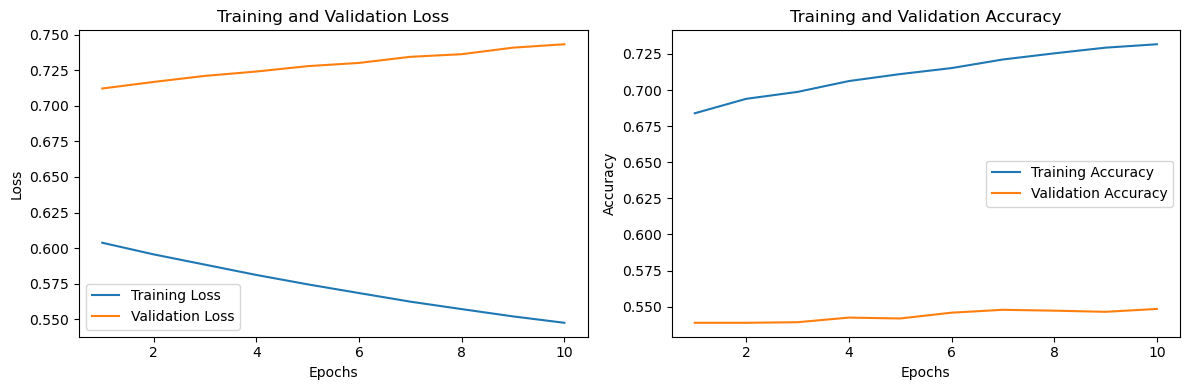

In [10]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Get training and validation loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_loss, label='Training Loss')
plt.plot(range(1, 11), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_acc, label='Training Accuracy')
plt.plot(range(1, 11), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


10- Check the accuracy and the loss of your models on the test dataset.

In [11]:

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

782/782 [==============================] - 1s 872us/step - loss: 0.7498 - accuracy: 0.5407
Test Loss: 0.749846875667572
Test Accuracy: 0.5407199859619141


## Tuning The Vanilla RNN Network


11- Prepare the data to use sequences of length 80 rather than length 30 and retrain your model.  Did it improve the performance?

12- Try different values of the  maximum length of a sequence ("max_features").  Can you improve the performance?

13- Try smaller and larger sizes of the RNN hidden dimension.  How does it affect the model performance?  How does it affect the run time?

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to length 80
x_train_padded = pad_sequences(x_train, maxlen=80)
x_test_padded = pad_sequences(x_test, maxlen=80)

# Modify the model input shape for sequences of length 80
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=50, input_length=80))
model.add(SimpleRNN(units=5, kernel_initializer='random_normal'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with padded sequences
history = model.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test_padded, y_test)

# Print test accuracy
print("Test Accuracy:", test_accuracy)


Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5908 - accuracy: 0.6870 - val_loss: 0.5260 - val_accuracy: 0.7486
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4774 - accuracy: 0.7817 - val_loss: 0.5085 - val_accuracy: 0.7592
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4380 - accuracy: 0.8088 - val_loss: 0.5161 - val_accuracy: 0.7512
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4038 - accuracy: 0.8295 - val_loss: 0.5329 - val_accuracy: 0.7458
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3671 - accuracy: 0.8518 - val_loss: 0.5518 - val_accuracy: 0.7414
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3346 - accuracy: 0.8697 - val_loss: 0.5878 - val_accuracy: 0.7326
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3107 - accuracy: 0.8812 - val_loss: 0.6231 - val_accuracy: 0.7292
Epoch 

In [13]:
 ## How does it affect the run time:  When the sequences are of higher length, the model takes longer to train and test since the maximum length of the sequence has increase from 30 to 80
## How does it affect model performance: the acuuracy of the model improves by 18.4%

## Train LSTM and GRU networks


14- Build LSTM and GRU networks and compare their performance (accuracy and execution time) with the SimpleRNN. What is your conclusion?

In [14]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=2000, output_dim=50, input_length=80))
model_lstm.add(LSTM(units=5))
model_lstm.add(Dense(units=1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss_lstm, test_accuracy_lstm = model_lstm.evaluate(x_test_padded, y_test)
print("LSTM Test Accuracy:", test_accuracy_lstm)



Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5520 - accuracy: 0.7193 - val_loss: 0.4959 - val_accuracy: 0.7520
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4417 - accuracy: 0.7940 - val_loss: 0.4807 - val_accuracy: 0.7598
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.4102 - accuracy: 0.8102 - val_loss: 0.4860 - val_accuracy: 0.7590
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3863 - accuracy: 0.8238 - val_loss: 0.4962 - val_accuracy: 0.7566
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3644 - accuracy: 0.8342 - val_loss: 0.5202 - val_accuracy: 0.7586
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3437 - accuracy: 0.8467 - val_loss: 0.5336 - val_accuracy: 0.7566
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3219 - accuracy: 0.8551 - val_loss: 0.5740 - val_accuracy: 0.7514
Epoch 

In [15]:
## CONCLUSION FOR THE LSTM MODEL: The accuracy improved from 71% to 75%, thus the LSTM model performs better compared to the Vanilla RNN model

In [16]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(Embedding(input_dim=2000, output_dim=50, input_length=80))
model_gru.add(GRU(units=5))
model_gru.add(Dense(units=1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model_gru.fit(x_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss_gru, test_accuracy_gru = model_gru.evaluate(x_test_padded, y_test)
print("GRU Test Accuracy:", test_accuracy_gru)

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5699 - accuracy: 0.6904 - val_loss: 0.5046 - val_accuracy: 0.7506
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4541 - accuracy: 0.7878 - val_loss: 0.4950 - val_accuracy: 0.7586
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4193 - accuracy: 0.8111 - val_loss: 0.4835 - val_accuracy: 0.7658
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3914 - accuracy: 0.8263 - val_loss: 0.4823 - val_accuracy: 0.7696
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3658 - accuracy: 0.8425 - val_loss: 0.4903 - val_accuracy: 0.7670
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3420 - accuracy: 0.8553 - val_loss: 0.4913 - val_accuracy: 0.7714
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3166 - accuracy: 0.8665 - val_loss: 0.5102 - val_accuracy: 0.7698
Epoch 

In [17]:
## CONCLUSION FOR THE GRU MODEL: The accuracy improved from 71% to 76%, thus the GRU model performs better compared to the vanilla RNN model. 
## The GRU model also works marginally better compared to the LSTM model because it discounts all words which are not used to compute if the review is positive or negative